### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [17]:
sample_data.height.mean()

67.579073529316659

In [19]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [11]:
sample_data['age'].unique()

array(['<21', '>=21'], dtype=object)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [30]:
diff = []

for _ in range(10000):
    bootsample_height = sample_data.sample(200, replace=True)
    mean_coff = bootsample_height[bootsample_height['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample_height[bootsample_height['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

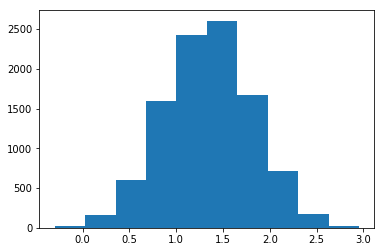

In [31]:
plt.hist(diff);

In [32]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.096005805340016737, 2.5540241039718237)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [27]:
diff_h_a = []

for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_height_ov_21 = bootsample[bootsample['age'] == '>=21']['height'].mean()
    mean_height_un_21 = bootsample[bootsample['age'] == '<21']['height'].mean()
    diff_h_a.append(mean_height_ov_21 - mean_height_un_21)


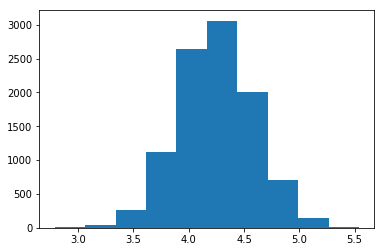

In [28]:
plt.hist(diff_h_a);

In [29]:
np.percentile(diff_h_a, 0.5), np.percentile(diff_h_a, 99.5)

(3.3502745897258372, 5.1090599001897354)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [25]:
diff_h_a_c = []

for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_height_un21_coff = bootsample[(bootsample['age'] == '<21') & (bootsample['drinks_coffee'] == True)]['height'].mean()
    mean_height_un21_noncoff = bootsample[(bootsample['age'] == '<21') & (bootsample['drinks_coffee'] == False)]['height'].mean()
    diff_h_a_c.append(mean_height_un21_coff - mean_height_un21_noncoff)


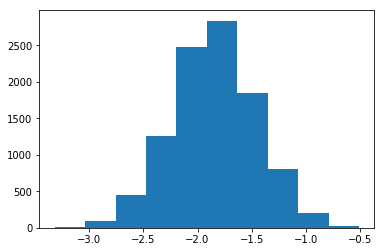

In [26]:
plt.hist(diff_h_a_c);

In [34]:
np.percentile(diff_h_a_c, 0.5), np.percentile(diff_h_a_c, 99.5)

(-2.8550736437376805, -0.84912054643496493)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [35]:
diff_h_c = []

for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_height_ov21_coff = bootsample[(bootsample['age'] == '>=21') & (bootsample['drinks_coffee'] == True)]['height'].mean()
    mean_height_ov21_noncoff = bootsample[(bootsample['age'] == '>=21') & (bootsample['drinks_coffee'] == False)]['height'].mean()
    diff_h_c.append(mean_height_ov21_coff - mean_height_ov21_noncoff)

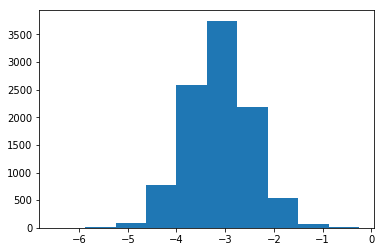

In [37]:
plt.hist(diff_h_c);

In [38]:
np.percentile(diff_h_c, 0.5), np.percentile(diff_h_c, 99.5)

(-4.8109488329750247, -1.3984368642287228)